In [ ]:
# !pip install fbprophet  ---> valid for <=3.9
# !python --version
# New version
# !python -m pip install prophet

In [ ]:
#IMPORTING ALL THE NECESSARY PACKAGES.
import matplotlib.pyplot as plt                                                 #Importing matplotlib to plot and analyse data.
import pandas as pd
import plotly.express as px

from pandas import read_csv
from prophet import Prophet                                                   #Importing prophet (prediction and forecasting library.)
import yfinance as yf                                                           #importing yahoo finance to generate historic data.
from sklearn.metrics import mean_absolute_error

In [ ]:
# ticker = input("ENTER THE STOCK WHOSE PREDICTION YOU WANT : ") #taking stock name from the user. e.g.TCS
# df = yf.download(ticker+'.NS', start='2019-01-01' , end='2023-07-30') #using yf.download() downloading historic data for a stock for previous 4 years.
df = yf.download('PFIZER.NS', start='2019-01-01' , end='2023-07-30') #using yf.download() downloading historic data for a stock for previous 4 years.
print(df.tail())

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-07-24  3914.899902  3935.449951  3841.550049  3855.949951  3851.177246   
2023-07-25  3860.000000  3885.000000  3842.500000  3850.199951  3845.434326   
2023-07-26  3857.050049  3870.500000  3816.050049  3850.449951  3845.684082   
2023-07-27  3851.149902  3935.500000  3846.850098  3895.100098  3890.279053   
2023-07-28  3900.000000  3997.949951  3900.000000  3978.050049  3973.126221   

            Volume  
Date                
2023-07-24   12912  
2023-07-25    6941  
2023-07-26    7219  
2023-07-27   17698  
2023-07-28   27101  


In [ ]:
df = df.reset_index()                                           #indexing data_frame
# df17=df17.reset_index()

In [ ]:
fig = px.line(df, x='Date', y='Adj Close')
# fig = px.line(df17, x='Date', y='Adj Close')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6))
# ax1.plot(df['Date'], df['Adj Close'])
# ax1.set_title("2019-23 TIMEFRAME")

# ax2.plot(df17['Date'], df17['Adj Close'])
# ax2.set_title("2017-22 TIMEFRAME")

# plt.figure(figsize=(10,6)) -> incorrect


In [ ]:
df[['ds','y']] = df[['Date','Adj Close']]
df.drop(columns=['Date','Open','High','Low','Close','Adj Close','Volume'],inplace=True)
# df17[['ds','y']] = df17[['Date','Adj Close']]                  #preparing expected column names for prophet model
df.head()


,ds,y
0,2019-01-01,2614.812256
1,2019-01-02,2567.825684
2,2019-01-03,2531.766113
3,2019-01-04,2528.943359
4,2019-01-07,2498.438477


In [ ]:
# df_copy=df.copy();

In [ ]:
# df=df_copy.copy()

In [ ]:
df.head()

,ds,y
0,2019-01-01,2614.812012
1,2019-01-02,2567.825195
2,2019-01-03,2531.766357
3,2019-01-04,2528.943359
4,2019-01-07,2498.438232


In [ ]:
train_data=df.iloc[:906]
test_data=df.iloc[906:]

print('2019-23 split size')
print(f'training data size : {train_data.shape}')
print(f'testing data size : {test_data.shape}')

# print('2017-22 split size')
# print(f'training data size : {train17_data.shape}')
# print(f'testing data size : {test17_data.shape}')

2019-23 split size
training data size : (906, 1)
testing data size : (226, 1)


In [ ]:
train_data.head()

,ds,y
0,2019-01-01,2614.812256
1,2019-01-02,2567.825684
2,2019-01-03,2531.766113
3,2019-01-04,2528.943359
4,2019-01-07,2498.438477


In [ ]:
model = Prophet()
model.fit(train_data)
y_actual = test_data['y']
pred = model.predict(pd.DataFrame({'ds':test_data['ds']}))
y_pred = pred['yhat']
y_pred = y_pred.astype(int)

err=mean_absolute_error(y_actual, y_pred)
print(f"OUTPUT")
print(f"error for 2019-23 timeframe:{err}")



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnr5uw2r/wuei2kjz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnr5uw2r/rg0lkld5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=134', 'data', 'file=/tmp/tmplnr5uw2r/wuei2kjz.json', 'init=/tmp/tmplnr5uw2r/rg0lkld5.json', 'output', 'file=/tmp/tmplnr5uw2r/prophet_model6yyx_45f/prophet_model-20240605094824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:48:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:48:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


OUTPUT
error for 2019-23 timeframe:147.20088992498617


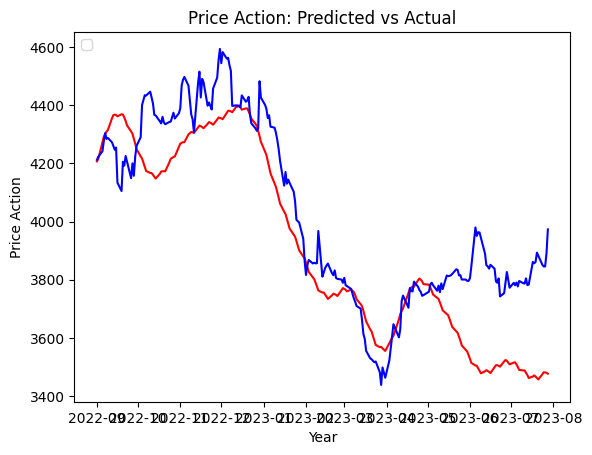

In [ ]:
plt.plot(test_data['ds'], y_pred, 'red')
plt.plot(test_data['ds'], y_actual, 'blue')
plt.xlabel("Year")
plt.ylabel("Price Action")
plt.title("Price Action: Predicted vs Actual")
plt.legend(loc="upper left")
plt.show()


## Let's try to forecast values instead of predicting

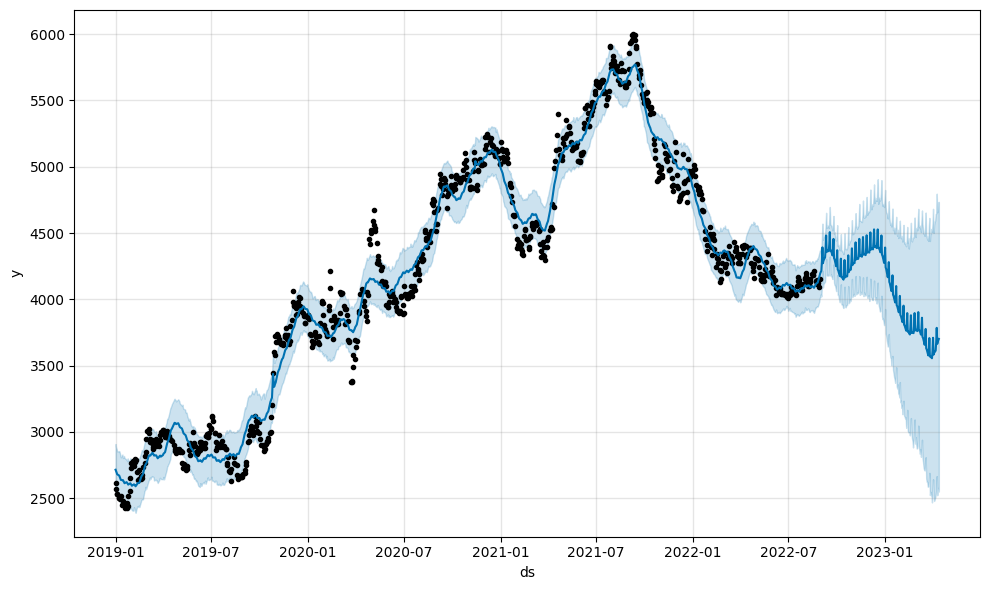

In [ ]:
future = model.make_future_dataframe(periods=226)

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = model.plot(forecast)

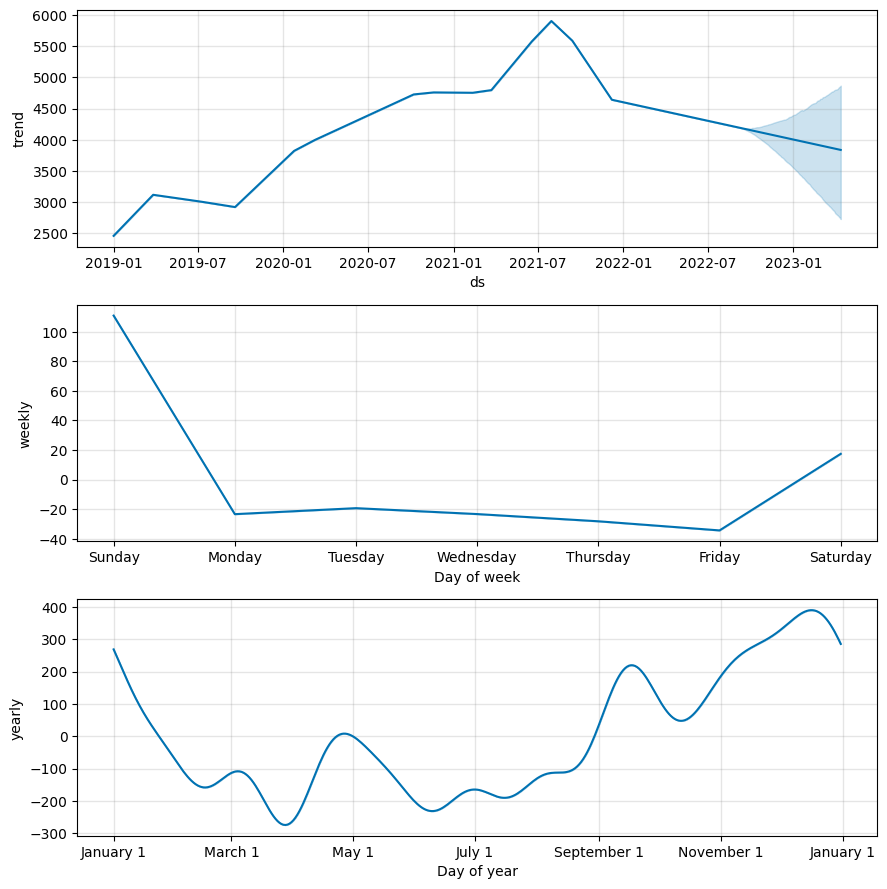

In [ ]:
fig2 = model.plot_components(forecast)

## Implementing the Auto Arima Model to forecast future values

In [ ]:
#We now convert the ds column to the index of the dataframe
df.set_index('ds',inplace=True)
df.index = pd.to_datetime(df.index)
df.head()

,y
ds,
2019-01-01,2614.812256
2019-01-02,2567.825928
2019-01-03,2531.766357
2019-01-04,2528.943115
2019-01-07,2498.438721


In [ ]:
# !pip install pmdarima
from pmdarima.arima import ADFTest
adf_test=ADFTest(alpha=0.05)
adf_test.should_diff(df['y'])
# returns p value and whether we should difference the time series

(0.73108631632047, True)

## We use the ‘Augmented Dickey-Fuller Test’ to check whether the data is stationary or not and got the output True so we have to use differencing

In [ ]:
# !pip install chart_studio
# import chart_studio
# chart_studio.tools.set_credentials_file(username='cout-sid', api_key='FgwfOKmEZVQMsdrFnJ2L')

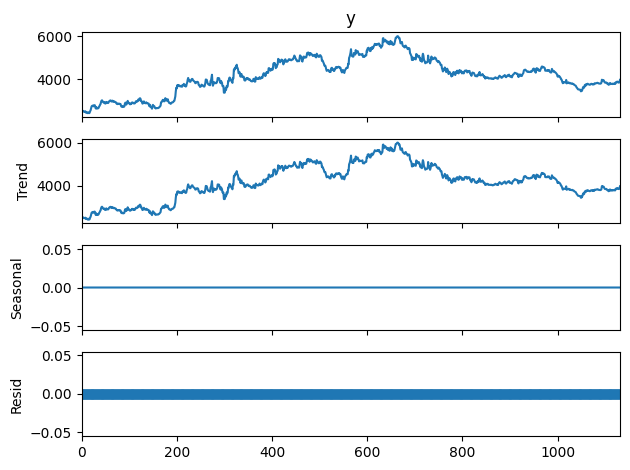

In [ ]:
# from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['y'], model='additive',period=1)
# Trying for different values of period we didn't get any seasonal trends
fig = result.plot()
plt.show()
# plot_mpl(fig)


In [ ]:
# train_data.dtypes

In [ ]:
train_data.head()

,y
ds,
2019-01-01,2614.812256
2019-01-02,2567.825928
2019-01-03,2531.766357
2019-01-04,2528.943115
2019-01-07,2498.438721


In [ ]:
train_data

,ds,y
0,2019-01-01,2614.812256
1,2019-01-02,2567.825684
2,2019-01-03,2531.766113
3,2019-01-04,2528.943359
4,2019-01-07,2498.438477
...,...,...
901,2022-08-24,4144.436035
902,2022-08-25,4118.208984
903,2022-08-26,4122.076172
904,2022-08-29,4090.197266


In [ ]:

from pmdarima.arima import auto_arima
# arima_model =  auto_arima(train_data,start_p=0, start_q=10,
#                           max_p=10, max_q=30,
#                           max_order=20,m=3,
#                           error_action='warn',trace = True,
#                           supress_warnings=True,stepwise = True,
#                           random_state=20,n_fits = 50 )

arima_model =  auto_arima(train_data['y'],
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )
# d if set to none is decided  by the model automatically
# m if not set is by default 1 which means yearly or no seasonal trends and we don't have any seasonal trends



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10245.200, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10247.116, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10247.124, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10243.743, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10249.038, Time=0.68 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.962 seconds


In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  906
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5120.872
Date:                Wed, 05 Jun 2024   AIC                          10243.743
Time:                        10:04:50   BIC                          10248.551
Sample:                             0   HQIC                         10245.580
                                - 906                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4812.4751    123.800     38.873      0.000    4569.832    5055.118
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               862.97
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.61
Prob(H) (two-sided):                  0.12   Kurtosis:                         7.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_data.set_index('ds',inplace=True)
train_data.index = pd.to_datetime(train_data.index)
test_data.set_index('ds',inplace=True)
test_data.index = pd.to_datetime(test_data.index)
# train_data.head()

KeyError: "None of ['ds'] are in the columns"

In [ ]:
# pred = arima_model.predict(n_periods=226)
# print(pred[:10])
# print(test_data[:10])

prediction = pd.DataFrame(arima_model.predict(n_periods = 226))
prediction.columns = ['predicted_sales']
prediction.index = test_data.index
print(prediction.head())
print(test_data.head())

            predicted_sales
ds                         
2022-09-01      4153.410156
2022-09-02      4153.410156
2022-09-05      4153.410156
2022-09-06      4153.410156
2022-09-07      4153.410156
                      y
ds                     
2022-09-01  4212.458008
2022-09-02  4223.068359
2022-09-05  4241.412109
2022-09-06  4275.323730
2022-09-07  4304.228027


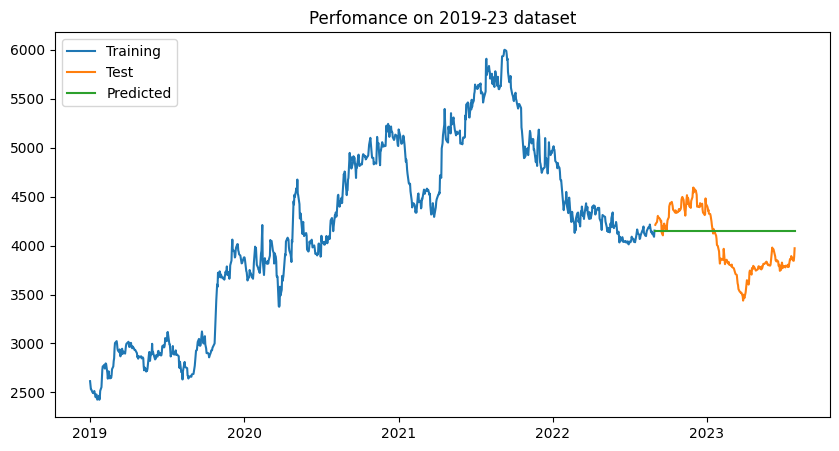

In [ ]:
# using default parameters of auto_arima and p=0 d=1 q=0 m=0 P=D=Q=0
plt.figure(figsize=(10,5))
plt.title("Perfomance on 2019-23 dataset")
plt.plot(train_data,label="Training")
plt.plot(test_data.index,test_data,label="Test")
plt.plot(test_data.index,prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
auto_input = train_data['y'].squeeze()
auto_input.head()

print(type(auto_input))

from pmdarima.arima import auto_arima
# auto_arima accepts either Series(index is used by auto_arima) or numpy array
arima_model =  auto_arima(auto_input,start_p=3, start_q=3,
                          max_p=10, max_q=30,
                          max_order=20,
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )



<class 'pandas.core.series.Series'>
Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10250.046, Time=5.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10245.200, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10247.116, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10247.124, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10243.743, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10249.038, Time=0.67 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 6.200 seconds


In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 226))
prediction.columns = ['predicted_sales']
prediction.index = test_data.index
print(prediction.head())
print(test_data.head())

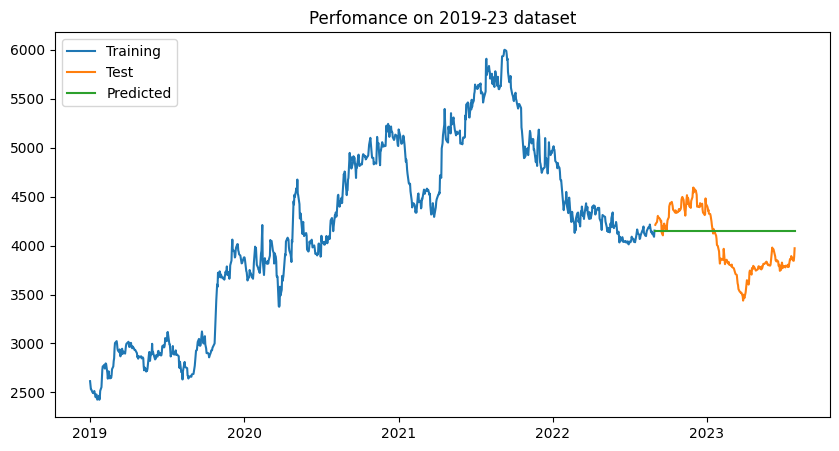

In [ ]:
# Plotting for  d=1 else=0 but using series as input to auto_arima

plt.figure(figsize=(10,5))
plt.title("Perfomance on 2019-23 dataset")
plt.plot(train_data,label="Training")
plt.plot(test_data.index,test_data,label="Test")
plt.plot(test_data.index,prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# !pip install sktime
train_data.head()

,y
ds,
2019-01-01,2614.812256
2019-01-02,2567.825928
2019-01-03,2531.766357
2019-01-04,2528.943115
2019-01-07,2498.438721


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

history = [x for x in list(train_data['y'])]
predictions = list()
# walk-forward validation
for t in range(len(test_data)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test_data['y'].iloc[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts

# model_fit.plot_predict(dynamic=False)  ---->
# this is the same as what we are doing above that is using all the values uptil now
# The output will look artificially good but we have not forecasted the values


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1131
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6313.382
Date:                Wed, 05 Jun 2024   AIC                          12638.765
Time:                        10:55:31   BIC                          12668.945
Sample:                             0   HQIC                         12650.167
                               - 1131                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0067      0.026      0.262      0.793      -0.044       0.057
ar.L2          0.0207      0.022      0.947      0.344      -0.022       0.064
ar.L3          0.0087      0.025      0.349      0.727      -0.040       0.058
ar.L4         -0.0298      0.025     -1.211      0.226      -0.078       0.018
ar.L5         -0.0688      0.026     -2.645      0.008      -0.120      -0.018
sigma2      4186.9633     97.009     43.161      0.000    3996.829    4377.097
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1307.46
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Test RMSE: 41.789


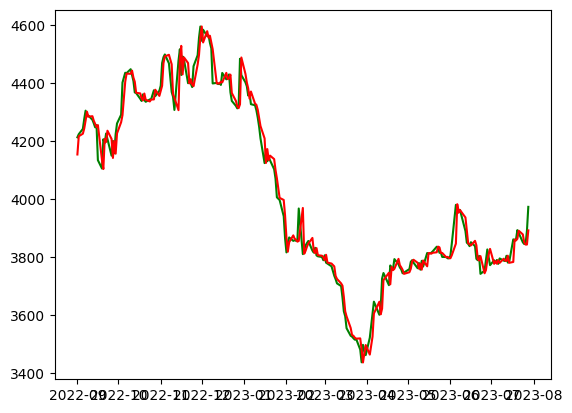

In [ ]:
rmse = sqrt(mean_squared_error(list(test_data['y']), predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test_data.index,test_data,color='green')
plt.plot(test_data.index,predictions, color='red')
plt.show()

In [ ]:
input=train_data.copy()
input.reset_index(inplace=True,drop=True)
input.head()

,y
0,2614.812256
1,2567.825684
2,2531.766113
3,2528.943359
4,2498.438477


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(input, order=(1,2,1))
model_fit = model.fit()

# forecast_results = model_fit.forecast(steps=226, alpha=0.05)  # 95% conf
fc = model_fit.forecast(226,alpha=0.05)  # 95% conf
fc

# Extract forecasted values
# fc = forecast_results.predicted_mean
# # Extract standard errors of the forecasts
# se = forecast_results.se_mean
# # Extract confidence intervals
# conf = forecast_results.conf_int(alpha=0.05)




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


906     4154.047258
907     4154.070827
908     4154.088380
909     4154.105875
910     4154.123369
           ...     
1127    4157.919584
1128    4157.937078
1129    4157.954572
1130    4157.972066
1131    4157.989560
Name: predicted_mean, Length: 226, dtype: float64

In [ ]:
fc.head().values

array([4154.04725768, 4154.07082678, 4154.08838042, 4154.10587508,
       4154.12336916])

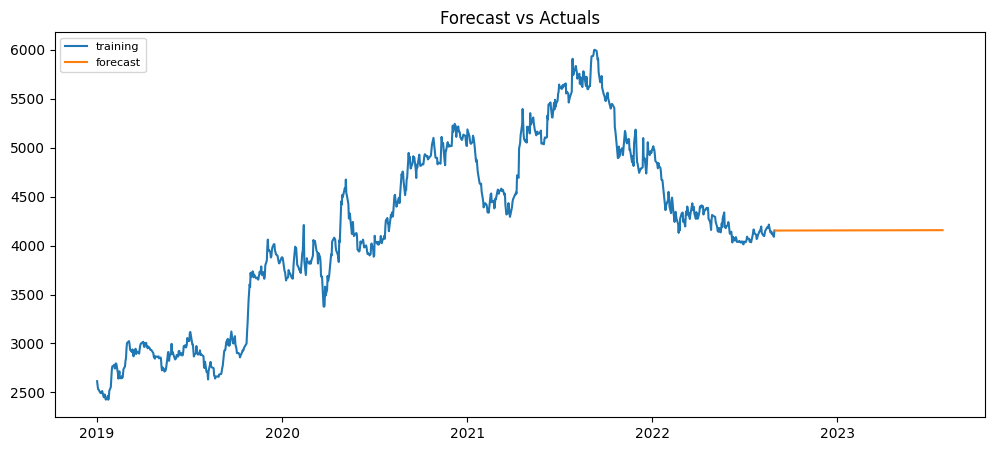

In [ ]:
# # Make as pandas series
fc_series = pd.Series(fc.values, index=test_data.index)
# lower_series = pd.Series(conf[:, 0], index=test_data.index)
# upper_series = pd.Series(conf[:, 1], index=test_data.index)

# # Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
# plt.plot(test_data, label='actual')
plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series,
#                  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# df.head()

,ds,y
0,2019-01-01,2614.812256
1,2019-01-02,2567.825684
2,2019-01-03,2531.766113
3,2019-01-04,2528.943359
4,2019-01-07,2498.438477


In [ ]:
df.set_index('ds',inplace=True)
df.index = pd.to_datetime(df.index)
# df.head()
time_series=df['y'].squeeze()
time_series.head()

ds
2019-01-01    2614.812256
2019-01-02    2567.825684
2019-01-03    2531.766113
2019-01-04    2528.943359
2019-01-07    2498.438477
Name: y, dtype: float64

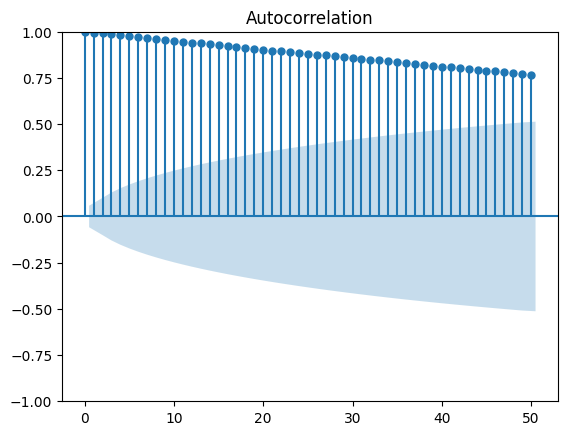

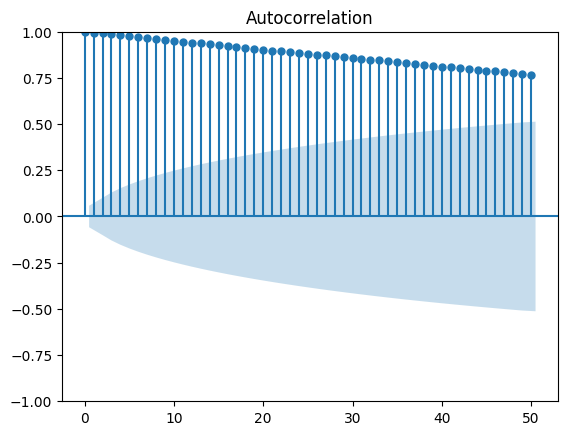

In [ ]:
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(time_series,lags=50)

### *The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.*

### *It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.*

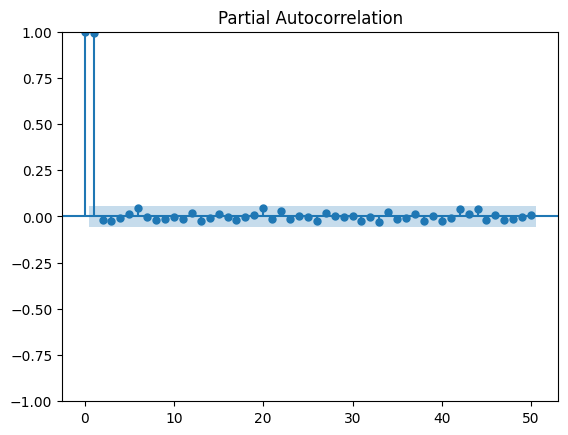

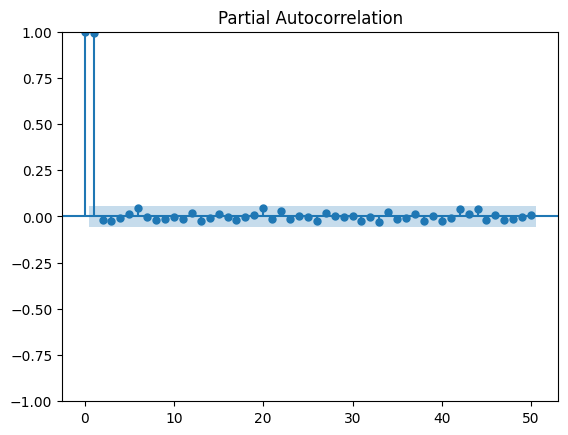

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(time_series,lags=50)

## **Accuracy Metrics for Predictions**
* Mean Absolute Percentage Error (MAPE)
* Mean Error (ME)
* Mean Absolute Error (MAE)
* Mean Percentage Error (MPE)
* Root Mean Squared Error (RMSE)
* Lag 1 Autocorrelation of Error (ACF1)
* Correlation between the Actual and the Forecast (corr)




In [ ]:
    # mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    # me = np.mean(forecast - actual)             # ME
    # mae = np.mean(np.abs(forecast - actual))    # MAE
    # mpe = np.mean((forecast - actual)/actual)   # MPE
    # rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    # corr = np.corrcoef(forecast, actual)[0,1]   # corr
    # acf1 = acf(fc-test)[1]                      # ACF1